In [20]:
import numpy as np
import os
from os.path import isfile
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Bidirectional, LSTM, Dropout, Activation, GRU
from keras.layers import Conv2D, concatenate, MaxPooling2D, Flatten, Embedding, Lambda


from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import Adam, RMSprop

from keras import regularizers


import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dict_genres = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 
               'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7  }


reverse_map = {v: k for k, v in dict_genres.items()}
print(reverse_map)

{0: 'Electronic', 1: 'Experimental', 2: 'Folk', 3: 'Hip-Hop', 4: 'Instrumental', 5: 'International', 6: 'Pop', 7: 'Rock'}


In [22]:
npzfile = np.load('half_test_arr.npz')
print(npzfile.files)
X_test = npzfile['arr_0']
y_test = npzfile['arr_1']
y_test = y_test -1
z_header = npzfile['arr_2']
print(X_test.shape, y_test.shape,z_header.shape)

['arr_0', 'arr_1', 'arr_2']
(1600, 320, 128) (1600,) (2, 1600)


In [23]:
from keras.models import load_model

weights_path = 'models/parallel/weights.best.h5'
model = load_model(weights_path)

In [24]:
# y_test -= 1
print(np.amin(y_test), np.amax(y_test), np.mean(y_test))

0 7 3.5


In [25]:
X_test_raw = librosa.core.db_to_power(X_test, ref=1.0)
print(np.amin(X_test_raw), np.amax(X_test_raw), np.mean(X_test_raw))

1e-08 1.0 0.005247334162755299


In [26]:
from sklearn.metrics import classification_report
X_test_raw = np.log(X_test_raw)


y_true = y_test
X_test_raw = np.expand_dims(X_test_raw, axis = -1)
y_pred = model.predict(X_test_raw)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7]
target_names = dict_genres.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(1600,) (1600,)
               precision    recall  f1-score   support

   Electronic       0.61      0.57      0.59       200
 Experimental       0.25      0.34      0.29       200
         Folk       0.22      0.30      0.25       200
      Hip-Hop       0.62      0.77      0.69       200
 Instrumental       0.49      0.33      0.39       200
International       0.53      0.37      0.44       200
          Pop       0.34      0.12      0.18       200
         Rock       0.48      0.64      0.55       200

     accuracy                           0.43      1600
    macro avg       0.44      0.43      0.42      1600
 weighted avg       0.44      0.43      0.42      1600



[[114  15   4  21  12  17   2  15]
 [ 14  69  42   6  24  11   9  25]
 [  0  86  60   1  13  10   9  21]
 [  9  13   3 154   5   7   3   6]
 [  7  45  68   2  66   7   3   2]
 [  9   5  58  13   2  74  13  26]
 [ 24  11  32  46  10   9  25  43]
 [ 10  29  11   4   4   5  10 127]]


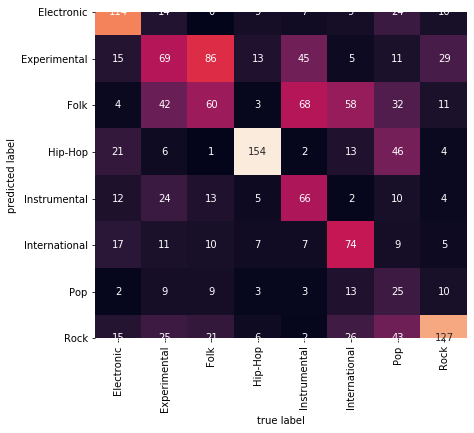

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 6))

mat = confusion_matrix(y_true, y_pred)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,ax =ax,
            xticklabels=dict_genres.keys(),
            yticklabels=dict_genres.keys())



plt.xlabel('true label')
plt.ylabel('predicted label');

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.430625


In [29]:
# y_true = y_test
# X_test_exp = np.expand_dims(X_test, axis = -1)
y_pred_song = model.predict(X_test_raw)



# y_pred = np.argmax(y_pred, axis=1)
# labels = [0,1,2,3,4,5,6,7]
# target_names = dict_genres.keys()

# print(y_true.shape, y_pred.shape)
# print(classification_report(y_true, y_pred, target_names=target_names))

In [30]:
dict_genres_subset = {'Hip-Hop':0 ,'Instrumental':1 ,'Rock': 2  }


reverse_map_subset = {v: k for k, v in dict_genres_subset.items()}
print(reverse_map_subset)

{0: 'Hip-Hop', 1: 'Instrumental', 2: 'Rock'}


In [31]:
counter = 0
idx_hip = []
idx_rock = []
idx_instrumental = []
for values in y_test:
    if (values == 3 and counter % 2 ==0):
        print(counter,values)
        idx_hip.append(counter)
        
    counter= counter + 1

counter =0
for values in y_test:
    if (values == 7 and counter % 2 ==0):
        print(counter,values)
        idx_rock.append(counter)
        
    counter= counter + 1

counter =0
for values in y_test:
    if (values == 4 and counter % 2 ==0):
        print(counter,values)
        idx_instrumental.append(counter)
        
    counter= counter + 1


126 3
290 3
382 3
504 3
552 3
634 3
814 3
816 3
876 3
878 3
886 3
954 3
956 3
958 3
998 3
1000 3
1022 3
1024 3
1026 3
1028 3
1030 3
1032 3
1034 3
1036 3
1038 3
1040 3
1054 3
1056 3
1058 3
1060 3
1062 3
1064 3
1066 3
1068 3
1070 3
1072 3
1074 3
1076 3
1078 3
1080 3
1100 3
1102 3
1104 3
1106 3
1108 3
1116 3
1118 3
1120 3
1122 3
1124 3
1126 3
1128 3
1130 3
1180 3
1182 3
1184 3
1186 3
1318 3
1354 3
1428 3
1430 3
1432 3
1434 3
1436 3
1438 3
1466 3
1468 3
1470 3
1472 3
1474 3
1490 3
1492 3
1494 3
1496 3
1498 3
1516 3
1518 3
1520 3
1522 3
1524 3
1532 3
1534 3
1536 3
1538 3
1540 3
1542 3
1546 3
1548 3
1550 3
1572 3
1574 3
1576 3
1584 3
1586 3
1588 3
1590 3
1592 3
1594 3
1596 3
1598 3
0 7
30 7
32 7
204 7
216 7
238 7
244 7
246 7
248 7
250 7
252 7
254 7
256 7
258 7
260 7
262 7
264 7
266 7
268 7
280 7
282 7
284 7
292 7
314 7
334 7
336 7
340 7
342 7
352 7
570 7
572 7
578 7
580 7
584 7
586 7
588 7
616 7
628 7
656 7
658 7
698 7
700 7
702 7
704 7
706 7
708 7
710 7
728 7
766 7
768 7
774 7
778 7
780 7
7

In [32]:
# print("Image data",X_test.shape)
# print("Music Genere", y_test.shape)
# print("Title and Artist",z_header.shape,"\n")

song = 126 

print("Genre: ",reverse_map[y_test[song]])
print("Artist: ",z_header[0][song])
print("Song: ",z_header[1][song])
# for row in z_header:
#     print("Artist:",row[song])


# for col in y_test:
#     print(reverse_map[col])    

Genre:  Hip-Hop
Artist:  Audible Intelligence
Song:  Steppin' In


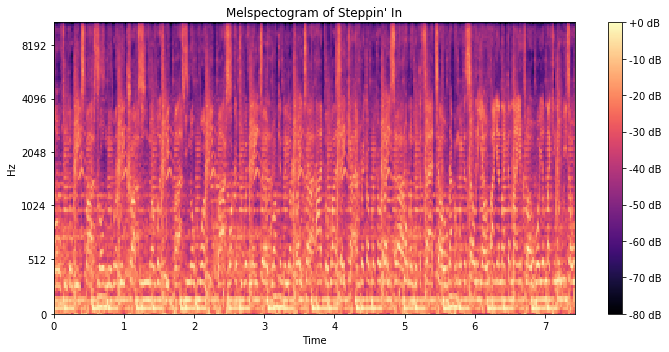

In [33]:
spectogram_test = X_test[song]
genre_test = y_test[song]
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectogram_test.T, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Melspectogram'+' of '+ z_header[1][song])
plt.tight_layout()

In [34]:
y_pred_song_one = y_pred_song[song]
print(y_pred_song_one)

[6.73061877e-04 1.48927728e-02 2.11276789e-03 9.56857920e-01
 8.55118386e-04 8.58019979e-04 1.15460865e-02 1.22042997e-02]


In [35]:
prediction = y_pred_song_one[3:5]
prediction = np.insert(prediction, [2],y_pred_song_one[7])
print(prediction)
print('\n')
prediction_song = np.argmax(prediction)
print(reverse_map_subset[prediction_song])


[9.568579e-01 8.551184e-04 1.220430e-02]


Hip-Hop


 Total Correct Hip-Hop Predictions

In [37]:

total_correct = 0
for x in idx_hip:
    print("Genre: ",reverse_map[y_test[x]])
    print("Artist: ",z_header[0][x])
    print("Song: ",z_header[1][x])
    y_pred_song_one = y_pred_song[x]
    print(y_pred_song_one)
    prediction = y_pred_song_one[3:5]
    prediction = np.insert(prediction, [2],y_pred_song_one[7])
    print(prediction)
#     print('\n')
    prediction_song = np.argmax(prediction)
    print(reverse_map_subset[prediction_song])
    if(reverse_map_subset[prediction_song] == reverse_map[y_test[x]]):
        total_correct = total_correct + 1
    print("\n")
    
print("Total Correct:",total_correct)
print("Total Correct out of Total predictions: ", total_correct/len(idx_hip))


Genre:  Hip-Hop
Artist:  Audible Intelligence
Song:  Steppin' In
[6.73061877e-04 1.48927728e-02 2.11276789e-03 9.56857920e-01
 8.55118386e-04 8.58019979e-04 1.15460865e-02 1.22042997e-02]
[9.568579e-01 8.551184e-04 1.220430e-02]
Hip-Hop


Genre:  Hip-Hop
Artist:  Sleaze
Song:  God Damn
[0.04180761 0.30973133 0.01828172 0.39879635 0.00305313 0.02322461
 0.06297206 0.14213324]
[0.39879635 0.00305313 0.14213324]
Hip-Hop


Genre:  Hip-Hop
Artist:  Asthmatic Astronaut
Song:  Horn's for breakfast
[0.17277811 0.30685043 0.06654175 0.098749   0.04998876 0.00660084
 0.12173106 0.17676008]
[0.098749   0.04998876 0.17676008]
Rock


Genre:  Hip-Hop
Artist:  Coolzey
Song:  Enjoy Your Holiday
[0.02064588 0.07036078 0.0078312  0.6976122  0.00414414 0.00379941
 0.11106987 0.0845364 ]
[0.6976122  0.00414414 0.0845364 ]
Hip-Hop


Genre:  Hip-Hop
Artist:  Katrah-Quey ft. dj Alekzander
Song:  tameka method (pt.1)
[0.13459556 0.15113766 0.11528636 0.10566182 0.04394288 0.04420726
 0.30713722 0.09803117]
[0

 Total Correct Rock Predictions

In [38]:
total_correct = 0
for x in idx_rock:
    print("Genre: ",reverse_map[y_test[x]])
    print("Artist: ",z_header[0][x])
    print("Song: ",z_header[1][x])
    y_pred_song_one = y_pred_song[x]
    print(y_pred_song_one)
    prediction = y_pred_song_one[3:5]
    prediction = np.insert(prediction, [2],y_pred_song_one[7])
    print(prediction)
#     print('\n')
    prediction_song = np.argmax(prediction)
    print(reverse_map_subset[prediction_song])
    if(reverse_map_subset[prediction_song] == reverse_map[y_test[x]]):
        total_correct = total_correct + 1
    print("\n")
    
print("Total Correct:",total_correct)
print("Total Correct out of Total predictions: ", total_correct/len(idx_rock))


Genre:  Rock
Artist:  Ariel Pink's Haunted Graffiti
Song:  Jules Lost His Jewels
[0.01814496 0.11405881 0.00891078 0.05233245 0.1209174  0.01861098
 0.17512709 0.49189746]
[0.05233245 0.1209174  0.49189746]
Rock


Genre:  Rock
Artist:  Fallen Leaves
Song:  Days of Summer
[0.00271602 0.01211293 0.03713903 0.00961982 0.01259789 0.08145765
 0.07084049 0.7735161 ]
[0.00961982 0.01259789 0.7735161 ]
Rock


Genre:  Rock
Artist:  Psychedelic Horseshit
Song:  New Wave Hippies
[0.00097087 0.01697038 0.00184344 0.00103824 0.00156498 0.00319814
 0.02181736 0.95259655]
[0.00103824 0.00156498 0.95259655]
Rock


Genre:  Rock
Artist:  Brad Sucks
Song:  Never Get Out
[0.28936607 0.09481474 0.0044314  0.3030442  0.01421851 0.04780116
 0.20653042 0.0397935 ]
[0.3030442  0.01421851 0.0397935 ]
Hip-Hop


Genre:  Rock
Artist:  M.A.Z.C.A.
Song:  Seven Faces of Him
[1.1399067e-03 3.3332563e-03 1.7878053e-03 4.4501922e-03 5.5609490e-03
 7.5064640e-04 1.5754772e-02 9.6722257e-01]
[0.00445019 0.00556095 0.96722

 Total Correct Instrumental Predictions

In [39]:
total_correct = 0
for x in idx_instrumental:
    print("Genre: ",reverse_map[y_test[x]])
    print("Artist: ",z_header[0][x])
    print("Song: ",z_header[1][x])
    y_pred_song_one = y_pred_song[x]
    print(y_pred_song_one)
    prediction = y_pred_song_one[3:5]
    prediction = np.insert(prediction, [2],y_pred_song_one[7])
    print(prediction)
#     print('\n')
    prediction_song = np.argmax(prediction)
    print(reverse_map_subset[prediction_song])
    if(reverse_map_subset[prediction_song] == reverse_map[y_test[x]]):
        total_correct = total_correct + 1
    print("\n")
    
print("Total Correct:",total_correct)
print("Total Correct out of Total predictions: ", total_correct/len(idx_instrumental))

Genre:  Instrumental
Artist:  JayDee
Song:  Tree Symphony
[0.0032074  0.33531705 0.19757819 0.01157048 0.11778607 0.16127224
 0.031002   0.1422666 ]
[0.01157048 0.11778607 0.1422666 ]
Rock


Genre:  Instrumental
Artist:  Circus Marcus
Song:  Valse du tout au fond
[0.06443411 0.50886995 0.1879496  0.00129741 0.12539424 0.05559368
 0.05493543 0.00152555]
[0.00129741 0.12539424 0.00152555]
Instrumental


Genre:  Instrumental
Artist:  Circus Marcus
Song:  Pompas de Jabón
[3.0305427e-02 6.0888696e-02 1.7823027e-01 1.4632099e-04 6.4807439e-01
 2.5924692e-02 4.7650386e-02 8.7798620e-03]
[1.4632099e-04 6.4807439e-01 8.7798620e-03]
Instrumental


Genre:  Instrumental
Artist:  Teatro Grotesco
Song:  Doctor Faust
[0.04908284 0.3977388  0.00487574 0.00046417 0.23780213 0.00058069
 0.01778881 0.29166687]
[0.00046417 0.23780213 0.29166687]
Rock


Genre:  Instrumental
Artist:  Teatro Grotesco
Song:  Pornography, the cult of the body and the death of Eros
[1.3176035e-02 8.1495130e-01 5.7465572e-02 1.2